## Welcome to P8 Hands On

In [1]:
#!pip install tensorflow
#!pip install factor_analyzer

In [2]:
import numpy as np
import pandas as pd
import sklearn
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

import matplotlib.pyplot as plt
import seaborn as sns
import time

import factor_analyzer
from factor_analyzer import FactorAnalyzer

import tensorflow as tf
from tensorflow import keras

### Part 1: PCA For Visualization

Pada kali ini, kita akan melihat bagaimana PCA dapat memudahkan kita melakukan visualisasi data 'multidimensi'. Data yang akan kita gunakan sebagai contoh adalah data bernama `fashion_mnist`. 

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Mari kita lihat contoh salah satu data dari dataset ini.

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Wah, bentuknya sangat aneh, banyak 0, dan banyak angka-angka yang terlihat 'asing' dan 'random'. Ini data apaan sih?

Label dari gambar ini adalah: 9


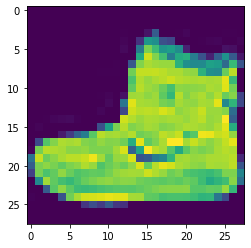

In [6]:
plt.imshow(x_train[0])
print('Label dari gambar ini adalah:', y_train[0])

Ternyata, data-data di atas adalah nilai dari pixel dalam sebuah gambar berukuran 28 x 28. Jika kita gambarkan, maka `x_train[0]` membantuk sebuah sepatu boot.

Label dari gambar ini adalah: 0


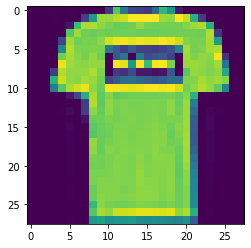

In [7]:
plt.imshow(x_train[1])
print('Label dari gambar ini adalah:', y_train[1])

Sementara `x_train[1]` berbentuk kaos.

Detil tentang dataset ini dapat dilihat di: https://github.com/zalandoresearch/fashion-mnist

In [8]:
dictionary = {0:'T-Shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt',
              7:'Sneaker', 8:'Bag', 9:'Boots'}

Label dari gambar ini adalah: 8
Label 8 menunjukkan pada produk Bag


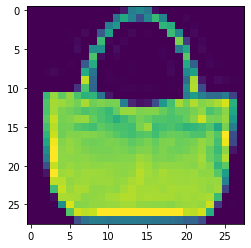

In [9]:
plt.imshow(x_train[100])
print('Label dari gambar ini adalah:', y_train[100])
print(f'Label {y_train[100]} menunjukkan pada produk {dictionary[y_train[100]]}')

Sekarang, mari kita 'ratakan' bentuk 28x28 tadi. 

In [10]:
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

In [11]:
df = pd.DataFrame(x_train_flat)
df['label'] = y_train
df['name'] = df['label'].map(dictionary)

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,label,name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,Boots
1,0,0,0,0,0,1,0,0,0,0,...,130,76,0,0,0,0,0,0,0,T-Shirt
2,0,0,0,0,0,0,0,0,0,22,...,1,0,0,0,0,0,0,0,0,T-Shirt
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,3,Dress
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T-Shirt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,Sandal
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Trouser
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,3,Dress
59998,0,0,0,0,0,0,0,0,0,0,...,50,5,0,1,0,0,0,0,0,T-Shirt


Dataset kita memiliki ukuran 60 000 baris dan memiliki 784 kolom numerik, serta 2 kolom yang menunjukkan "gambar" dari setiap baris.

#### PCA Part!

Bila kita ingin membuat sebuah plot 2 dimensi yang berisi produk-produk tersebut, maka sebelumnya kita perlu melakukan PCA terlebih dahulu.

Sebagai demonstrasi, mari kita visualisasikan produk-produk berikut:
- Sneaker
- Boots
- Dress

In [13]:
from sklearn.decomposition import PCA
pca_visual = PCA(2)

Artinya, kita ingin membuat PCA dengan 2 Principal Component.

In [14]:
df_pilihan = df[df['name'].isin(['Sneaker', 'Boots', 'Dress'])].reset_index(drop = True)

In [15]:
x_pilihan = df_pilihan.iloc[:,:-2]

In [16]:
pca_visual.fit(x_pilihan)
df_pca = pd.DataFrame(pca_visual.transform(x_pilihan))
df_pca['label'] = df_pilihan['label']
df_pca['name'] = df_pca['label'].map(dictionary)

In [17]:
df_pca

,0,1,label,name
0,-765.091150,1564.802266,9,Boots
1,1198.482474,-333.839292,3,Dress
2,-789.687142,-1046.903476,7,Sneaker
3,530.133650,1528.680303,9,Boots
4,-616.261774,-1373.674247,7,Sneaker
...,...,...,...,...
17995,15.057845,1354.471571,9,Boots
17996,-1026.558791,418.654952,7,Sneaker
17997,1924.532712,101.602722,3,Dress
17998,-784.065530,-581.997610,7,Sneaker


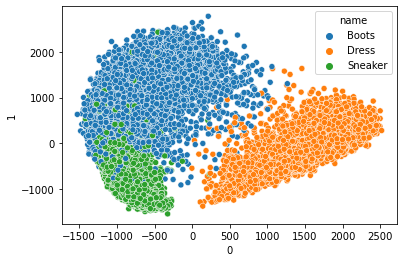

In [18]:
sns.scatterplot(data = df_pca, x = 0, y = 1, hue = 'name')
plt.show()

Dapat terlihat bahwa:
- Boots dan Sneakers mirip, maka dari itu pada scatterplot, mereka memiliki lokasi yang 'dekat' dan banyak 'overlap'
- Dress memiliki 'gerombolan sendiri', terpisah dari 'Boots dan Sneakers'

Meskipun data berkurang dari 784 kolom sampai hanya 2 kolom saja, namun data hasil PCA masih bisa menangkap 'kesan' dan 'hubungan' bahwa:
- Boots dan Sneakers adalah produk-produk yang terlihat mirip
- Dress 'beda' dari kedua produk di atas

Masih belum puas? Bagaimana kalau kita coba 'Sneakers', 'T-Shirt', dan 'Dress'? Dua produk atasan, dan satu untuk alas kaki. Kira-kira bentuknya seperti apa ya?

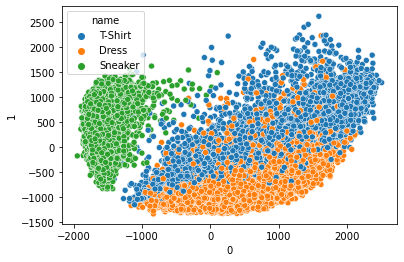

In [19]:
from sklearn.decomposition import PCA
pca_visual = PCA(2)

df_pilihan = df[df['name'].isin(['Sneaker', 'T-Shirt', 'Dress'])].reset_index(drop = True)
x_pilihan = df_pilihan.iloc[:,:-2]

pca_visual.fit(x_pilihan)
df_pca = pd.DataFrame(pca_visual.transform(x_pilihan))
df_pca['label'] = df_pilihan['label']
df_pca['name'] = df_pca['label'].map(dictionary)

sns.scatterplot(data = df_pca, x = 0, y = 1, hue = 'name')
plt.show()

Di sini kita melihat bahwa PCA dapat menangkap hubungan antara 3 produk dengan baik:
- T-Shirt dan Dress berjarak dekat, dan ada beberapa yang 'overlapping'
- Sneaker yang 'beda sendiri'

Dalam PCA, kita belajar yang namanya 'explained variance', yaitu berapa 'persen' pesebaran data (variance) dalam dataset yang masih bisa dijelaskan setelah data tersebut direduksi oleh PCA.

In [20]:
pca_visual.explained_variance_ratio_

array([0.44805283, 0.11486961])

Artinya, PC 1 (Principal Component Pertama, sumbu-x) menjelaskan 44.8% variance dalam data, sementara itu, PC 2 (Principal Component Kedua, sumbu-y) menjelaskan 11.48% variance dalam data.

Hanya 2 PC saja sudah bisa menjelaskan total >50% variance of the data. Berarti, lebih dari setengah informasi yang terkandung dalam data dapat 'dijelaskan' hanya oleh 2 Principal Components. Jika kita melihat bahwa data ini memiliki 784 kolom pada awalnya, maka kita akan sadar bahwa ini adalah hal yang menakjubkan.

Namun, bagaimana jika kita ingin menerapkan PCA bukan untuk visualisasi?

### Part 2: PCA for Data Size Reduction

Mari kita langsung belajar implementasinya di Python.
Kali ini, kita tidak hanya melakukan PCA, tapi membandingkan:
- Logistic Regression tanpa terlebih dahulu melakukan PCA, vs
- Logistic Regression dengan PCA

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [22]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Dataset yang di-download ini adalah dataset gambar-gambar pakaian (baju, celana, sepatu, dst). Bentuk datanya seperti berikut:

In [23]:
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

Tapi, jika kita gambarkan, maka akan jadi seperti berikut:

Label dari gambar ini adalah: 9


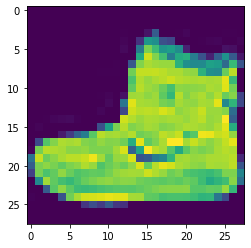

In [24]:
plt.imshow(x_train[0])
print('Label dari gambar ini adalah:', y_train[0])

Label dari gambar ini adalah: 0


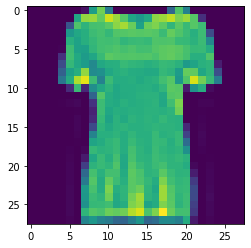

In [25]:
plt.imshow(x_train[10])
print('Label dari gambar ini adalah:', y_train[10])

Seperti yang terkandung dalam namanya, dataset ini berisi gambar 'fashion images' dan memiliki label 0 sampai 9. Apabila kita membaca dokumentasi dengan baik, maka kita mengetahui bahwa label-label nomor tersebut adalah sebagai berikut.

- Label 0: T-Shirt (Kaos)
- Label 1: Trouser (Celana Panjang)
- Label 2: Pullover (Kaos Lengan Panjang)
- Label 3: Dress (Gaun)
- Label 4: Coat (Jaket, Sweater, dll)
- Label 5: Sandal
- Label 6: Shirt (Kemeja)
- Label 7: Sneaker (Sepatu)
- Label 8: Bag (Tas)
- Label 9: Ankle Boot (Sepatu Boots)

In [26]:
dictionary = {0:'T-Shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt',
              7:'Sneaker', 8:'Bag', 9:'Boots'}

In [27]:
x_train[0].shape

(28, 28)

In [28]:
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

In [29]:
pd.DataFrame(x_train_flat)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [30]:
pd.DataFrame(y_train)

,0
0,9
1,0
2,0
3,3
4,0
...,...
59995,5
59996,1
59997,3
59998,0


Pertama, mari kita buat sebuah fungsi yang akan melakukan hal-hal berikut:
1. Melatih model logistic regression berdasarkan data training
2. Mencatat waktu yang dibutuhkan untuk melatih model logistic regression
3. Mencatat akurasi model logistic regression (melakukan prediksi pada test set, dan membandingkan prediksi tsb dengan nilai aktualnya)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def fit_evaluate(x_train, y_train, x_test, y_test, return_pred = False):
    model = LogisticRegression()
    start = time.time()
    model.fit(x_train, y_train)
    end = time.time()

    duration = end-start
    accuracy = accuracy_score(y_test, model.predict(x_test))

    if return_pred == False:
        return duration, accuracy
    else:
        return duration, accuracy, model.predict(x_test)

In [32]:
duration_raw, accuracy_raw = fit_evaluate(x_train_flat, y_train,
                                    x_test_flat, y_test)

In [33]:
print('Time elapsed:', duration_raw, 'seconds.')
print('Model accuracy:', accuracy_raw, 'percent.')

Time elapsed: 23.802830934524536 seconds.
Model accuracy: 0.8412 percent.


Model Logistic Regression memakan waktu 24 seconds (di laptop/mesin saya. Mungkin, di mesin teman-teman, angkanya bisa berbeda). Akurasinya sekitar 84 persen.

Selanjutnya, mari kita lakukan PCA terlebih dahulu terhadap `x_train_flat`, baru hasil PCA nya kita masukkan sebagai `training` dan `test` data. 

In [34]:
from sklearn.decomposition import PCA
pca_95 = PCA(0.95)

Oke. Kita berhenti dulu. Apa artinya `PCA(0.95)`? Artinya, kita ingin mengambil sebanyak `n` Principal Components, sampai `variance` yang dapat dijelaskan PCA mencapai 95%.

In [35]:
start_time = time.time()
pca_95.fit(x_train_flat)
x_train_pca_95 = pca_95.transform(x_train_flat)
x_test_pca_95 = pca_95.transform(x_test_flat)
finish_time = time.time()

In [36]:
print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('Hanya tersisa:', pca_95.n_components_, 'feature columns setelah dlakukan PCA.')
print('PCA kali ini berhasil mereduksi dataset sebanyak', (1-(pca_95.n_components_/784))*100, 'persen')

PCA Fit and Transform finished in 10.863161563873291 seconds.
Hanya tersisa: 187 feature columns setelah dlakukan PCA.
PCA kali ini berhasil mereduksi dataset sebanyak 76.14795918367348 persen


In [37]:
pca_95.n_components_

187

Ternyata, untuk mencapai 95% explained variance, hanya dibutuhkan 187 kolom. Padahal, jika kita ingat, di awal tadi, data kita awalnya memiliki lebih dari 700 kolom!

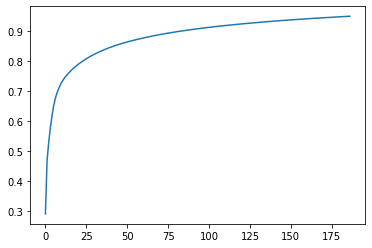

In [38]:
plt.plot(np.cumsum(pca_95.explained_variance_ratio_))
plt.show()

Jika kita mau lebih ekstrem, kita bisa saja memilih hanya 100 Principal Components, karena explained variancenya sudah sekitar 90%. Let's do that the next time! Sekarang, kita fokus dulu di PCA 0.95.

In [39]:
duration_pca, accuracy_pca = fit_evaluate(x_train_pca_95, y_train,
                                    x_test_pca_95, y_test)

In [40]:
print('Time elapsed:', duration_pca, 'seconds.')
print('Model accuracy:', accuracy_pca, 'percent.')

Time elapsed: 10.09374475479126 seconds.
Model accuracy: 0.8425 percent.


In [41]:
x_train_pca_95.shape

(60000, 187)

In [42]:
x_train_flat.shape

(60000, 784)

Ternyata, logistic regression yang dilatih menggunakan data yang telah di-PCA kan hanya memakan waktu 10 detik (di mesin/laptop saya). Kurang dari 50% waktu di awal tadi. Bagaimana dengan di device teman-teman sekalian? 

Akurasinya pun masih sama, di sekitar 84%. This is the power of PCA.
Next, kita coba dengan mengambil 100 Principal Components pertama. 

In [70]:
from sklearn.decomposition import PCA

pca_2 = PCA(100) # take 100 principal components

start_time = time.time()
pca_2.fit(x_train_flat)
x_train_pca_2 = pca_2.transform(x_train_flat)
x_test_pca_2 = pca_2.transform(x_test_flat)
finish_time = time.time()

print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('Hanya tersisa:', pca_2.n_components_, 'feature columns setelah dlakukan PCA.')
print('PCA kali ini berhasil mereduksi dataset sebanyak', (1-(pca_2.n_components_/784))*100, 'persen')

PCA Fit and Transform finished in 5.080373764038086 seconds.
Hanya tersisa: 100 feature columns setelah dlakukan PCA.
PCA kali ini berhasil mereduksi dataset sebanyak 87.24489795918367 persen


In [71]:
duration_pca_2, accuracy_pca_2 = fit_evaluate(x_train_pca_2, y_train,
                                    x_test_pca_2, y_test)

print('Time elapsed:', duration_pca_2, 'seconds.')
print('Model accuracy:', accuracy_pca_2, 'percent.')

Time elapsed: 8.075601577758789 seconds.
Model accuracy: 0.8375 percent.


Waktu yang dimakan lebih singkat lagi. Memang, akurasinya pun menurun, namun tidak sampai drastis. Padahal, hanya 13-14% data original yang kita masukkan ke model Logistic Regression. 

### Part 3: Factor Analysis

Factor Analysis adalah sebuah metode untuk mengelompokkan berbagai variabel bebas apabila kita mengasumsikan terdapat hubungan antara variabel-variabel bebas tersebut. 

Dataset yang digunakan dalam mempelajari Factor Analysis adalah data Personality Test yang dilakukan HRD perusahaan. Nama-nama kolom melambangkan personality traits yang dimiliki oleh peserta.

Terkaan saya adalah data ini nantinya akan menjadi data klasifikasi (1 vs 0 = 1 >> diterima, 0 >> tidak diterima). Tapi kolom `y` ini tidak terdapat pada dataset yang diberikan. Tidak masalah, karena yang kita pelajari sekarang adalah `unsupervised` learning.

Apakah 32 'aspek kepribadian' bisa disederhanakan menjadi jumlah kolom yang lebih sedikit?

In [45]:
data = pd.read_csv('personality_hr.csv')

In [46]:
data

,"""distant""","""talkatv""","""carelss""","""hardwrk""","""anxious""","""agreebl""","""tense""","""kind""","""opposng""","""relaxed""",...,"""lazy""","""coopera""","""quiet""","""organiz""","""criticl""","""lax""","""laidbck""","""withdrw""","""givinup""","""easygon"""
0,3,8,2,7,5,8,4,8,5,7,...,2,7,6,6,4,3,7,2,2,7
1,6,6,2,5,1,8,2,9,2,8,...,5,8,7,4,5,5,7,6,2,8
2,3,7,6,7,8,8,2,8,3,7,...,3,8,4,7,6,6,6,4,3,7
3,7,3,3,5,8,6,7,2,3,3,...,6,6,7,5,5,3,3,7,5,5
4,7,6,7,6,7,8,7,8,5,5,...,5,7,8,6,6,4,4,6,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,3,6,3,7,5,6,4,7,3,7,...,4,7,4,7,5,5,6,6,3,7
235,2,8,3,7,2,7,2,7,2,8,...,4,6,4,7,2,4,7,3,2,7
236,4,9,3,9,7,7,5,7,5,5,...,3,5,2,7,3,3,7,2,1,6
237,3,8,4,9,7,6,5,6,3,5,...,1,6,5,7,5,2,5,3,2,7


In [47]:
data.columns

Index(['"distant"', '"talkatv"', '"carelss"', '"hardwrk"', '"anxious"',
       '"agreebl"', '"tense"', '"kind"', '"opposng"', '"relaxed"', '"disorgn"',
       '"outgoin"', '"approvn"', '"shy"', '"discipl"', '"harsh"', '"persevr"',
       '"friendl"', '"worryin"', '"respnsi"', '"contrar"', '"sociabl"',
       '"lazy"', '"coopera"', '"quiet"', '"organiz"', '"criticl"', '"lax"',
       '"laidbck"', '"withdrw"', '"givinup"', '"easygon"'],
      dtype='object')

Pertama, mari kita lakukan terlebih dahulu pengujian "Bartlett Sphericity" dan "KMO". Dua uji ini menguji apakah adanya 'hubungan' antara variabel-variabel prediktor (berupa 32 aspek kepribadian).

In [48]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

##### Uji Hipotesis Bartlett Sphericity

In [49]:
chi2,p = calculate_bartlett_sphericity(data)
print("Bartlett Sphericity Test")
print("Chi squared value : ", chi2)
print("p value : ", p)

Bartlett Sphericity Test
Chi squared value :  4023.800388782076
p value :  0.0


Hipotesis 0: Tidak ada 'faktor' yang dapat dibentuk dari variabel bebas data kita

Hipotesis Alternatif: Ada 'faktor' yang dapat dibentuk dari variabel bebas data kita

p-value = 0, berarti kita bisa menolak hipotesis 0. Artinya, ada 'faktor' yang dapat dibentuk dari variabel bebas pada data kita.

##### Uji KMO (KAISER-MEYER-OLKIN)

KMO adalah uji yang dilakukan untuk menentukan kelayakan (appropriateness) dari suatu analisis faktor yang akan dilakukan. Skala uji KMO berkisar antara 0 sampai 1. Jika nilai KMO hitung lebih rendah dari 0.5, maka analisis faktor tidak layak dilakukan. Sedangkan jika nilai KMO hitung lebih besar dari 0.5, maka analisis faktor layak dilakukan. 

In [50]:
kmo_all, kmo_model = calculate_kmo(data)
print("KMO Test Statisitc", kmo_model)

KMO Test Statisitc 0.8423659914570744


KMO = 0.84, nice! Berarti, Factor Analysis layak dilakukan.

##### Factor Analysis

Pertanyaannya sekarang adalah, ada berapa banyak faktor yang dapat kita ekstrak?

In [51]:
fa = FactorAnalyzer(rotation=None, n_factors=32)
fa.fit(data)

FactorAnalyzer(n_factors=32, rotation=None, rotation_kwargs={})

In [52]:
ev, _ = fa.get_eigenvalues()

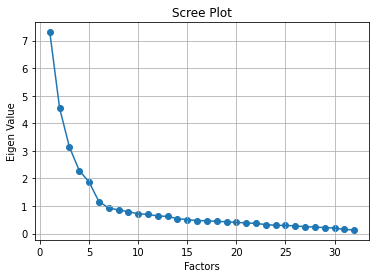

In [53]:
plt.scatter(range(1, data.shape[1]+1), ev)
plt.plot(range(1, data.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

Rule of thumb: Berapa jumlah Eigenvalue yang > 1 menunjukkan berapa banyak 'factor' yang dapat kita ekstrak. Terdapat 6 eigenvalue di atas 1, oleh sebab itu, jumlah faktor yang dapat dibuat adalah 6.

##### Interpreting Factors

In [54]:
fa = FactorAnalyzer(n_factors=6)
fa.fit(data)
pd.DataFrame(fa.loadings_, index=data.columns)

,0,1,2,3,4,5
"""distant""",0.621929,-0.036902,0.162649,-0.014300,0.116345,0.214723
"""talkatv""",-0.815645,0.047962,0.043568,0.034478,0.183825,0.198883
"""carelss""",-0.024458,0.084374,-0.025765,0.019814,0.692506,0.092016
"""hardwrk""",-0.075190,0.098361,0.699128,0.124157,-0.005432,0.104900
"""anxious""",0.078232,0.733435,-0.022812,0.260727,0.122874,0.125531
"""agreebl""",0.098896,0.028021,0.079148,0.665866,0.146381,-0.153350
"""tense""",0.041879,0.791837,0.001393,0.115947,0.067550,0.167397
"""kind""",0.002060,0.117663,0.107000,0.619342,-0.206475,-0.074915
"""opposng""",-0.116482,0.023685,-0.041461,-0.117537,-0.043428,0.665929
"""relaxed""",0.116094,-0.684155,-0.058510,0.292329,-0.010787,0.040779


In [55]:
data.iloc[0:1,:]

,"""distant""","""talkatv""","""carelss""","""hardwrk""","""anxious""","""agreebl""","""tense""","""kind""","""opposng""","""relaxed""",...,"""lazy""","""coopera""","""quiet""","""organiz""","""criticl""","""lax""","""laidbck""","""withdrw""","""givinup""","""easygon"""
0,3,8,2,7,5,8,4,8,5,7,...,2,7,6,6,4,3,7,2,2,7


Semakin 'besar' angkanya berarti semakin 'ngefek' variabel itu ke Faktor tersebut. Biar enak liatnya, mungkin bisa pakai heatmap.

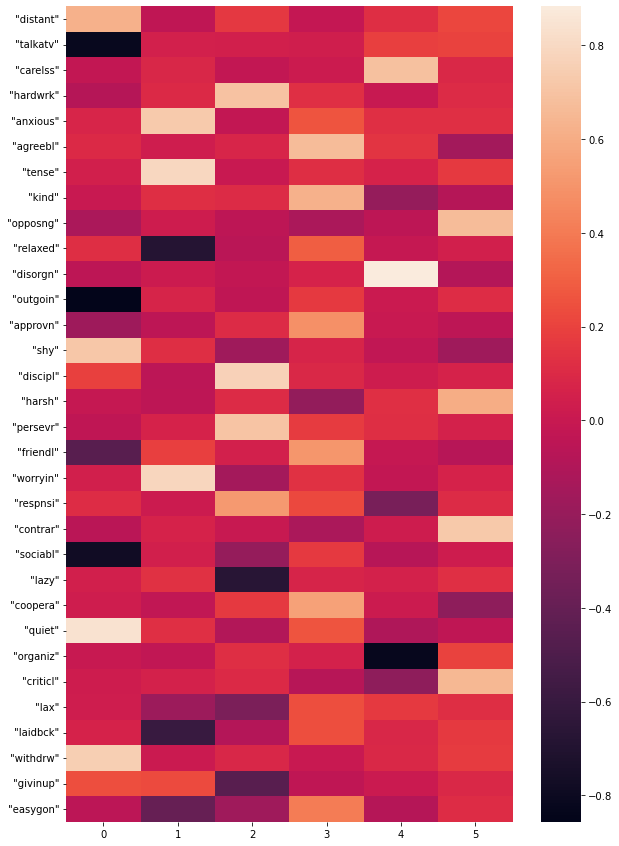

In [56]:
plt.subplots(figsize=(10, 15))
sns.heatmap(pd.DataFrame(fa.loadings_, index=data.columns))
plt.show()

1. Faktor 1: semakin tinggi nilainya, semakin 'introvert' orang tersebut
2. Faktor 2: semakin tinggi nilainya, semakin 'overthinking' orang tersebut
3. Faktor 3: semakin tinggi nilainya, semakin 'kerja keras' orang tersebut
4. Faktor 4: semakin tinggi nilainya, semakin 'friendly' orang tersebut
5. Faktor 5: semakin tinggi nilainya, semakin 'careless' orang tersebut
6. Faktor 6: semakin tinggi nilainya, semakin 'kritis' dan 'beroposisi' orang tersebut

Bagaimana mendapatkan data hasil transformasinya?

In [57]:
fa.transform(data)

array([[-0.57657874, -0.52473099,  0.10929076,  0.97781637,  0.00681953,
         0.11021309],
       [ 0.44847408, -1.61657734, -0.82357428,  1.63392545,  0.42181744,
        -0.74335314],
       [-0.04181686, -0.62816697,  0.27942843,  1.02876132, -0.25136663,
        -0.4686294 ],
       ...,
       [-1.67827425, -0.12884273,  0.7181034 ,  0.3281249 , -0.17935442,
         0.36579208],
       [-0.32987512,  0.57720329,  1.2547893 , -0.25565266, -0.39468171,
        -0.3836559 ],
       [ 1.59426064,  2.2569395 ,  0.06255801, -0.22121562,  1.74818343,
         2.61278997]])

In [58]:
new_data = pd.DataFrame(fa.transform(data))
new_data.columns = ['introverted', 'overthink', 'hardwork', 'friendly', 'careless', 'critical']
new_data

,introverted,overthink,hardwork,friendly,careless,critical
0,-0.576579,-0.524731,0.109291,0.977816,0.006820,0.110213
1,0.448474,-1.616577,-0.823574,1.633925,0.421817,-0.743353
2,-0.041817,-0.628167,0.279428,1.028761,-0.251367,-0.468629
3,2.581590,1.303622,-0.623350,-2.396868,0.689494,0.093807
4,1.399831,0.961596,-0.730540,0.747335,0.858348,0.906138
...,...,...,...,...,...,...
234,0.155423,-0.387941,0.126333,0.403399,-0.296421,0.085233
235,-0.598632,-1.572874,-0.490582,0.272096,0.018445,-1.189655
236,-1.678274,-0.128843,0.718103,0.328125,-0.179354,0.365792
237,-0.329875,0.577203,1.254789,-0.255653,-0.394682,-0.383656


Jadi, dari 32 kolom 'aspek-aspek kepribadian', bisa di'simplify' jadi 6 faktor saja. Nah, sekarang, yuk cari tahum berapa persen `explained variance` dari dataset baru kita ini.

In [59]:
pd.DataFrame(fa.get_factor_variance(), index=['Variance','Proportional Var','Cumulative Var'])

,0,1,2,3,4,5
Variance,4.579569,2.984119,2.872199,2.417710,2.335140,2.215520
Proportional Var,0.143112,0.093254,0.089756,0.075553,0.072973,0.069235
Cumulative Var,0.143112,0.236365,0.326121,0.401675,0.474648,0.543883


In [60]:
pd.DataFrame(fa.transform(data[5:10]))

,0,1,2,3,4,5
0,-0.680080,-0.990954,-1.993583,0.756953,1.813473,-0.140413
1,0.490557,0.959836,0.720589,0.031975,0.041068,0.323671
2,-0.752586,-1.106847,0.634519,0.772635,-0.669014,-0.104198
3,0.118238,-0.543430,0.249216,-0.486670,-0.186957,0.113697
4,0.712944,-0.540833,0.570667,-0.371079,-0.662538,0.800675


Jawabannya: 54%

### Part 4: KMeans Clustering

Untuk KMeans, kita akan mencoba melakukan clustering pada data mall customers, dan temukan apakah kita bisa mengelompokkan pengunjung mall.

In [61]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
data = pd.read_csv('Mall_Customers.csv')

In [62]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [63]:
### Pilih features
x = data.iloc[:, [3, 4]]

In [64]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [65]:
# Elbow Method
score = []

for cluster in range(1, 11):
    kmeans = KMeans(n_clusters = cluster)
    scaled_data = StandardScaler().fit_transform(x)
    kmeans.fit(scaled_data)
    score.append(kmeans.inertia_)

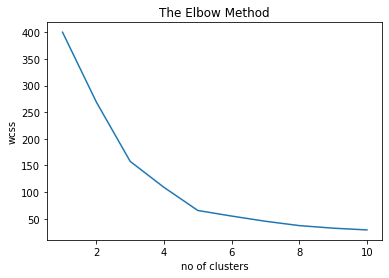

In [66]:
# plotting the score

plt.plot(range(1, 11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

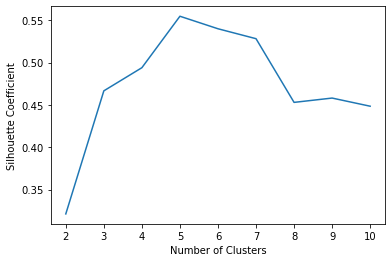

In [67]:
### Silhouette Score
silhouette_coefficients = []
from sklearn.metrics import silhouette_score

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    scaled_data = StandardScaler().fit_transform(x)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

'Elbow' terjadi di k = 3 dan k = 5, sedangkan nilai Silhouette tertinggi ada di k = 5. 

Berarti, kita bisa berasumsi bahwa k = 5 menjadi 'k' yang paling ideal dalam k-Means ini.

In [68]:
kmeans_final = KMeans(n_clusters=5)
data['cluster'] = kmeans_final.fit_predict(x)
data['cluster'] = data['cluster'].astype('category')

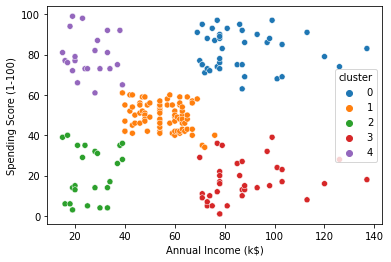

In [69]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster')
plt.show()

- Cluster 0: Income Tinggi, Spending Rendah
- Cluster 1: Balanced
- Cluster 2: Income Rendah, Spending Rendah
- Cluster 3: Income Tinggi, Spending Tinggi
- Cluster 4: Income Rendah, Spending Tinggi